# **MACHINE LEARNING PROJECT**

# **CURRENCY EXCHANGE RATE PREDICTION PROJECT**


# 1) EUR-INR (EURO TO INDIAN RUPEE)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
sns.set()
plt.style.use('seaborn-whitegrid')

In [2]:
data_eur = pd.read_csv("/Users/nirupam/Desktop/mlproject/EURINR_2011.csv")
print(data_eur.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2011-01-03  59.506001  59.575001  59.212002  60.011002  60.011002     0.0
1  2011-01-04  59.639000  60.426998  59.639000  59.577000  59.577000     0.0
2  2011-01-05  59.764999  60.094002  59.469002  59.743000  59.743000     0.0
3  2011-01-06  59.623001  59.679001  58.999001  59.483002  59.483002     0.0
4  2011-01-07  58.831001  59.046001  58.584000  58.754002  58.754002     0.0


In [3]:
data_eur.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2971,False,False,False,False,False,False,False
2972,False,False,False,False,False,False,False
2973,False,False,False,False,False,False,False
2974,False,False,False,False,False,False,False


In [4]:
data_eur.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [5]:
data_eur.dropna(axis=0,inplace=True)

In [6]:
data_eur.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

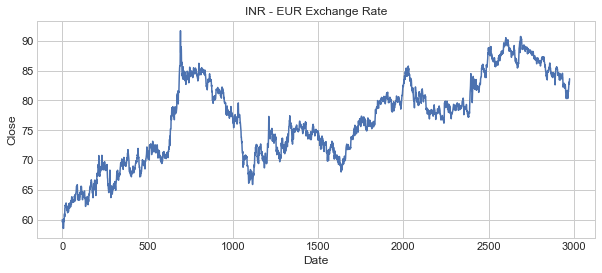

In [7]:
plt.figure(figsize=(10, 4))
plt.title("INR - EUR Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data_eur["Close"])
plt.show()

               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.988085  0.998773  0.988756   0.988756     NaN
High       0.988085  1.000000  0.987903  0.998736   0.998736     NaN
Low        0.998773  0.987903  1.000000  0.988133   0.988133     NaN
Close      0.988756  0.998736  0.988133  1.000000   1.000000     NaN
Adj Close  0.988756  0.998736  0.988133  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


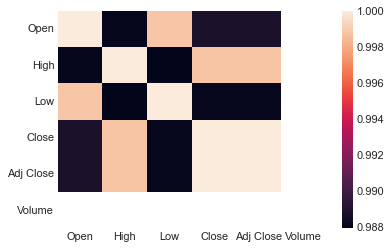

In [8]:
print(data_eur.corr())
sns.heatmap(data_eur.corr())
plt.show()

In [9]:
x = data_eur[["Open", "High", "Low"]]
y = data_eur["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.4, random_state=42)

In [11]:
model = LinearRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [12]:
data_pred1 = pd.DataFrame(data={"Predicted Rate": ypred.flatten()})
print(data_pred1.head())

   Predicted Rate
0       80.000447
1       84.785258
2       77.684985
3       70.882331
4       75.192840


### R2 SCORE AND MEAN ABSOLUTE ERROR

In [13]:
r2 = r2_score(ypred,ytest)
mean = mean_absolute_error(ypred,ytest)
print("r2_score is: ")
print(r2)
print("mean absolute error is: ")
print(mean)

r2_score is: 
0.9766216049530725
mean absolute error is: 
0.1718651794477685


### CROSS VALIDATION SCORE

In [14]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x,y,cv=5,scoring='r2')
score

array([0.77130077, 0.99334382, 0.97259596, 0.98190611, 0.98718978])

### MEAN OF CV SCORES

In [15]:
print(score.mean())

0.9412672881843938


### **PREDICTING TODAY'S EXCHANGE RATE EUR-IND (i.e., as of 10:30 A.M. on 31st May, 2022)**

In [16]:
testing_1 = np.array([[83.5699,83.5777,83.3111]])
actual_pred_1 = np.array([83.4767]) # as of 10:30 A.M. on 31st May, 2022
testing_1.reshape(1, -1)
testing_1

array([[83.5699, 83.5777, 83.3111]])

In [17]:
y_pred_testing_1 = model.predict(testing_1)
y_pred_testing_1

array([[83.5066668]])

In [18]:
abs_error_1 = abs(actual_pred_1 - y_pred_testing_1) # absolute error is low
abs_error_1

array([[0.0299668]])

# 2) JPY-INR (JAPANESE YEN TO INDIAN RUPEE)

In [19]:
data_jpy = pd.read_csv("/Users/nirupam/Desktop/mlproject/JPYINR_2011.csv")
print(data_jpy.head())

         Date     Open     High      Low    Close  Adj Close  Volume
0  2011-01-03  0.55074  0.55074  0.54549  0.54857    0.54857     0.0
1  2011-01-04  0.54518  0.54869  0.54456  0.54580    0.54580     0.0
2  2011-01-05  0.54783  0.55240  0.54419  0.54739    0.54739     0.0
3  2011-01-06  0.54516  0.54561  0.54287  0.54310    0.54310     0.0
4  2011-01-07  0.54279  0.54544  0.54219  0.54225    0.54225     0.0


In [20]:
data_jpy.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2971,False,False,False,False,False,False,False
2972,False,False,False,False,False,False,False
2973,False,False,False,False,False,False,False
2974,False,False,False,False,False,False,False


In [21]:
data_jpy.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [22]:
data_jpy.dropna(axis=0,inplace=True)

In [23]:
data_jpy.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

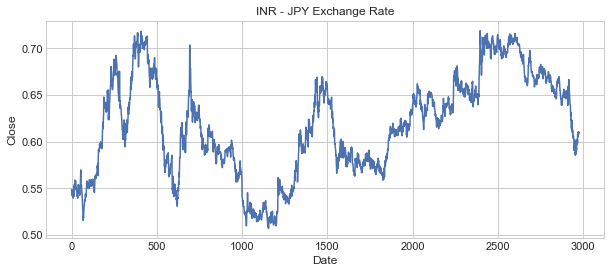

In [24]:
plt.figure(figsize=(10, 4))
plt.title("INR - JPY Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data_jpy["Close"])
plt.show()

               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.983228  0.998485  0.984473   0.984473     NaN
High       0.983228  1.000000  0.982875  0.997707   0.997707     NaN
Low        0.998485  0.982875  1.000000  0.983279   0.983279     NaN
Close      0.984473  0.997707  0.983279  1.000000   1.000000     NaN
Adj Close  0.984473  0.997707  0.983279  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


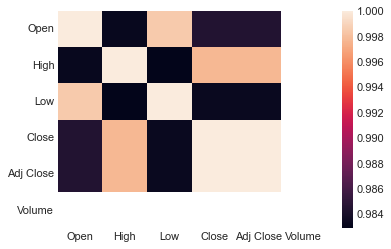

In [25]:
print(data_jpy.corr())
sns.heatmap(data_jpy.corr())
plt.show()

In [26]:
x2 = data_jpy[["Open", "High", "Low"]]
y2 = data_jpy["Close"]
x2 = x2.to_numpy()
y2 = y2.to_numpy()
y2 = y2.reshape(-1, 1)

In [27]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2, y2, test_size=0.4, random_state=42)

In [28]:
model2 = LinearRegression()
model2.fit(xtrain2, ytrain2)
ypred2 = model2.predict(xtest2)

In [29]:
data_pred3 = pd.DataFrame(data={"Predicted Rate": ypred2.flatten()})
print(data_pred3.head())

   Predicted Rate
0        0.672607
1        0.652237
2        0.619050
3        0.651908
4        0.645823


### R2 SCORE AND MEAN ABSOLUTE ERROR

In [30]:
r2_2 = r2_score(ypred2,ytest2)
mean_2 = mean_absolute_error(ypred2,ytest2)
print("r2_score is: ")
print(r2_2)
print("mean absolute error is: ")
print(mean_2)

r2_score is: 
0.944145392123127
mean absolute error is: 
0.0013135648257190551


### CROSS VALIDATION SCORE

In [31]:
from sklearn.model_selection import cross_val_score
score2 = cross_val_score(model2,x2,y2,cv=5,scoring='r2')
score2

array([0.89550763, 0.99178476, 0.99108702, 0.99038639, 0.98721787])

### MEAN OF CV SCORES

In [32]:
print(score2.mean())

0.9711967349801611


### **PREDICTING TODAY'S EXCHANGE RATE JPY-IND (i.e., as of 10:30 A.M. on 31st May, 2022)**

In [33]:
testing_2 = np.array([[0.607,0.6078,0.6044]])
actual_pred_2 = np.array([0.6071]) # as of 10:30 A.M. on 31st May, 2022
testing_2.reshape(1, -1)
testing_2

array([[0.607 , 0.6078, 0.6044]])

In [34]:
y_pred_testing_2 = model2.predict(testing_2)
y_pred_testing_2

array([[0.60674859]])

In [35]:
abs_error_2 = abs(actual_pred_2 - y_pred_testing_2) # absolute error is very low
abs_error_2

array([[0.00035141]])

# 3) GBP-INR (BRITISH POUND STERLING TO INDIAN RUPEE)

In [36]:
data_gbp = pd.read_csv("/Users/nirupam/Desktop/mlproject/GBPINR_2011.csv")
print(data_gbp.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2011-01-03  69.578003  69.578003  68.938004  69.970001  69.970001     0.0
1  2011-01-04  69.189003  70.461998  69.189003  69.057999  69.057999     0.0
2  2011-01-05  70.029999  70.773003  69.917999  69.981003  69.981003     0.0
3  2011-01-06  70.390999  70.427002  69.983002  70.094002  70.094002     0.0
4  2011-01-07  69.906998  70.390999  69.906998  69.896004  69.896004     0.0


In [37]:
data_gbp.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2971,False,False,False,False,False,False,False
2972,False,False,False,False,False,False,False
2973,False,False,False,False,False,False,False
2974,False,False,False,False,False,False,False


In [38]:
data_gbp.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [39]:
data_gbp.dropna(axis=0,inplace=True)

In [40]:
data_gbp.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

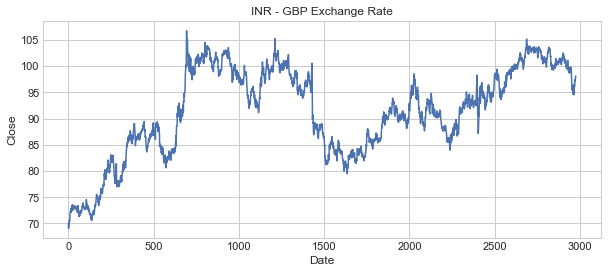

In [41]:
plt.figure(figsize=(10, 4))
plt.title("INR - GBP Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data_gbp["Close"])
plt.show()

               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.989553  0.988991  0.990138   0.990138     NaN
High       0.989553  1.000000  0.979462  0.998879   0.998879     NaN
Low        0.988991  0.979462  1.000000  0.979359   0.979359     NaN
Close      0.990138  0.998879  0.979359  1.000000   1.000000     NaN
Adj Close  0.990138  0.998879  0.979359  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


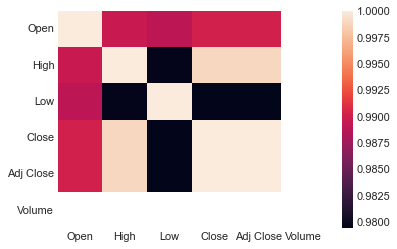

In [42]:
print(data_gbp.corr())
sns.heatmap(data_gbp.corr())
plt.show()

In [43]:
x3 = data_gbp[["Open", "High", "Low"]]
y3 = data_gbp["Close"]
x3 = x3.to_numpy()
y3 = y3.to_numpy()
y3= y3.reshape(-1, 1)

In [44]:
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(x3, y3, test_size=0.4, random_state=42)

In [45]:
model3 = LinearRegression()
model3.fit(xtrain3,ytrain3)
ypred3 = model3.predict(xtest3)

In [46]:
data_pred4 = pd.DataFrame(data={"Predicted Rate": ypred3.flatten()})
print(data_pred4.head())

   Predicted Rate
0       87.831115
1      100.657842
2       90.341313
3       87.668957
4       99.462897


### R2 SCORE AND MEAN ABSOLUTE ERROR

In [47]:
r2_3 = r2_score(ypred3,ytest3)
mean_3 = mean_absolute_error(ypred3,ytest3)
print("r2_score is: ")
print(r2_3)
print("mean absolute error is: ")
print(mean_3)

r2_score is: 
0.9594965307467139
mean absolute error is: 
0.1471747766629972


### CROSS VALIDATION SCORE

In [48]:
from sklearn.model_selection import cross_val_score
score3 = cross_val_score(model3,x3,y3,cv=5,scoring='r2')
score3

array([0.81942073, 0.98959542, 0.99775175, 0.98700636, 0.99017594])

### MEAN OF CV SCORES

In [49]:
print(score3.mean())

0.9567900434991634


### **PREDICTING TODAY'S EXCHANGE RATE GBP-IND (i.e., as of 10:30 A.M. on 31st May, 2022)**

In [50]:
testing_3 = np.array([[98.0804,98.0804,97.7506]])
actual_pred_3 = np.array([97.9779]) # as of 10:30 A.M. on 31st May, 2022
testing_3.reshape(1, -1)
testing_3

array([[98.0804, 98.0804, 97.7506]])

In [51]:
y_pred_testing_3 = model3.predict(testing_3)
y_pred_testing_3

array([[98.06162186]])

In [52]:
abs_error_3 = abs(actual_pred_3 - y_pred_testing_3) # absolute error is low
abs_error_3

array([[0.08372186]])

# 4) AUD-INR (AUSTRALIAN DOLLAR TO INDIAN RUPEE)

In [53]:
data_aud = pd.read_csv("/Users/nirupam/Desktop/mlproject/AUDINR_2011.csv")
print(data_aud.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2011-01-03  45.640999  45.659000  45.374001  45.858002  45.858002     0.0
1  2011-01-04  45.303001  45.457001  45.063000  45.320999  45.320999     0.0
2  2011-01-05  45.136002  45.395000  45.136002  45.136002  45.136002     0.0
3  2011-01-06  45.180000  45.243999  44.985001  45.202999  45.202999     0.0
4  2011-01-07  44.950001  45.249001  44.937000  44.925999  44.925999     0.0


In [54]:
data_aud.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2971,False,False,False,False,False,False,False
2972,False,False,False,False,False,False,False
2973,False,False,False,False,False,False,False
2974,False,False,False,False,False,False,False


In [55]:
data_aud.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [56]:
data_aud.dropna(axis=0,inplace=True)

In [57]:
data_aud.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

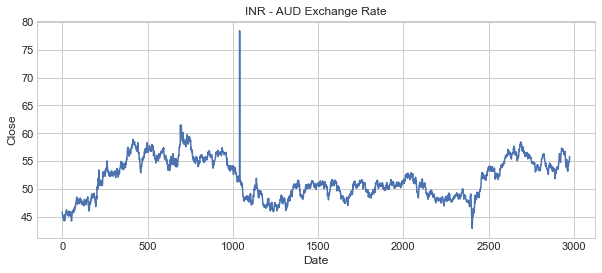

In [58]:
plt.figure(figsize=(10, 4))
plt.title("INR - AUD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data_aud["Close"])
plt.show()

               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.972715  0.997473  0.964255   0.964255     NaN
High       0.972715  1.000000  0.971732  0.987725   0.987725     NaN
Low        0.997473  0.971732  1.000000  0.962336   0.962336     NaN
Close      0.964255  0.987725  0.962336  1.000000   1.000000     NaN
Adj Close  0.964255  0.987725  0.962336  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


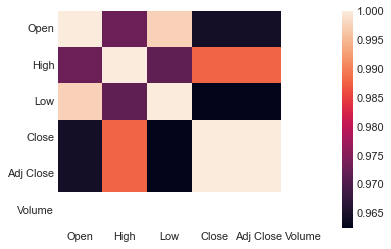

In [59]:
print(data_aud.corr())
sns.heatmap(data_aud.corr())
plt.show()

In [60]:
x4 = data_aud[["Open", "High", "Low"]]
y4 = data_aud["Close"]
x4 = x4.to_numpy()
y4 = y4.to_numpy()
y4 = y4.reshape(-1, 1)

In [61]:
xtrain4, xtest4, ytrain4, ytest4 = train_test_split(x4, y4, test_size=0.4, random_state=42)

In [62]:
model4 = LinearRegression()
model4.fit(xtrain4,ytrain4)
ypred4 = model4.predict(xtest4)

In [63]:
data_pred5 = pd.DataFrame(data={"Predicted Rate": ypred4.flatten()})
print(data_pred5.head())

   Predicted Rate
0       43.580891
1       54.131837
2       49.180289
3       57.250203
4       49.421972


### R2 SCORE AND MEAN ABSOLUTE ERROR

In [64]:
r2_4 = r2_score(ypred4,ytest4)
mean_4 = mean_absolute_error(ypred4,ytest4)
print("r2_score is: ")
print(r2_4)
print("mean absolute error is: ")
print(mean_4)

r2_score is: 
0.9529652973736025
mean absolute error is: 
0.12201426221030642


### CROSS VALIDATION SCORE

In [65]:
from sklearn.model_selection import cross_val_score
score4 = cross_val_score(model4,x4,y4,cv=5,scoring='r2')
score4

array([0.92705914, 0.89605231, 0.98650364, 0.98337329, 0.992796  ])

### MEAN OF CV SCORES

In [66]:
print(score4.mean())

0.9571568764687004


### **PREDICTING TODAY'S EXCHANGE RATE AUD-IND (i.e., as of 10:30 A.M. on 31st May, 2022)**

In [67]:
testing_4 = np.array([[55.8040,55.9080,55.5940]])
actual_pred_4 = np.array([55.8106]) # as of 10:30 A.M. on 31st May, 2022
testing_4.reshape(1, -1)
testing_4

array([[55.804, 55.908, 55.594]])

In [68]:
y_pred_testing_4 = model4.predict(testing_4)
y_pred_testing_4

array([[55.76804345]])

In [69]:
abs_error_4 = abs(actual_pred_4 - y_pred_testing_4) # absolute error is low
abs_error_4

array([[0.04255655]])

# 5) CAD-INR (CANADIAN DOLLAR TO INDIAN RUPEE)

In [70]:
data_cad = pd.read_csv("/Users/nirupam/Desktop/mlproject/CADINR_2011.csv")
print(data_cad.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2011-01-03  45.090000  45.090000  44.880001  44.910000  44.910000     0.0
1  2011-01-04  45.014000  45.361000  44.876999  44.882999  44.882999     0.0
2  2011-01-05  44.998001  45.578999  44.998001  44.935001  44.935001     0.0
3  2011-01-06  45.558998  45.601002  45.290001  45.377998  45.377998     0.0
4  2011-01-07  45.375999  45.798000  45.319000  45.339001  45.339001     0.0


In [71]:
data_cad.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2972,False,False,False,False,False,False,False
2973,False,False,False,False,False,False,False
2974,False,False,False,False,False,False,False
2975,False,False,False,False,False,False,False


In [72]:
data_cad.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [73]:
data_cad.dropna(axis=0,inplace=True)

In [74]:
data_cad.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

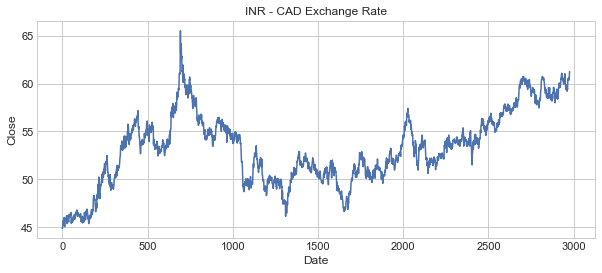

In [75]:
plt.figure(figsize=(10, 4))
plt.title("INR - CAD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data_cad["Close"])
plt.show()

               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.977842  0.998171  0.978896   0.978896     NaN
High       0.977842  1.000000  0.977405  0.998103   0.998103     NaN
Low        0.998171  0.977405  1.000000  0.977681   0.977681     NaN
Close      0.978896  0.998103  0.977681  1.000000   1.000000     NaN
Adj Close  0.978896  0.998103  0.977681  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


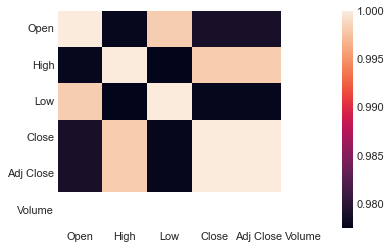

In [76]:
print(data_cad.corr())
sns.heatmap(data_cad.corr())
plt.show()

In [77]:
x5 = data_cad[["Open", "High", "Low"]]
y5 = data_cad["Close"]
x5 = x5.to_numpy()
y5 = y5.to_numpy()
y5= y5.reshape(-1, 1)

In [78]:
xtrain5, xtest5, ytrain5, ytest5 = train_test_split(x5, y5, test_size=0.4, random_state=42)

In [79]:
xtest5.shape

(1190, 3)

In [80]:
model5 = LinearRegression()
model5.fit(xtrain5,ytrain5)
ypred5 = model5.predict(xtest5)

In [81]:
data_pred6 = pd.DataFrame(data={"Predicted Rate": ypred5.flatten()})
print(data_pred6.head())

   Predicted Rate
0       51.850416
1       58.250614
2       51.436246
3       55.150403
4       49.779241


### R2 SCORE AND MEAN ABSOLUTE ERROR

In [82]:
r2_5 = r2_score(ypred5,ytest5)
mean_5 = mean_absolute_error(ypred5,ytest5)
print("r2_score is: ")
print(r2_5)
print("mean absolute error is: ")
print(mean_5)

r2_score is: 
0.9529340775043369
mean absolute error is: 
0.1148642564523237


### CROSS VALIDATION SCORE

In [83]:
from sklearn.model_selection import cross_val_score
score5 = cross_val_score(model5,x5,y5,cv=5,scoring='r2')
score5

array([0.90526345, 0.98871414, 0.98573412, 0.98617136, 0.98817434])

### MEAN OF CV SCORES

In [84]:
print(score5.mean())

0.9708114818297178


### **PREDICTING TODAY'S EXCHANGE RATE CAD-IND (i.e., as of 10:30 A.M. on 31st May, 2022)**

In [85]:
testing_5 = np.array([[61.2490,61.3000,61.1610]])
actual_pred_5 = np.array([61.2560]) # as of 10:30 A.M. on 31st May, 2022
testing_5.reshape(1, -1)
testing_5

array([[61.249, 61.3  , 61.161]])

In [86]:
y_pred_testing_5 = model5.predict(testing_5)
y_pred_testing_5

array([[61.24009937]])

In [87]:
abs_error = abs(actual_pred_5 - y_pred_testing_5) # absolute error is low
abs_error

array([[0.01590063]])

In [88]:
# R2 SCORES
#0.9766216049530725 - EUR
#0.944145392123127 - JPY
#0.9594965307467139 - GBP
#0.9529652973736025 - AUD
#0.9529340775043369 - CAD